In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('./pyusct/')
from rfdata import RFdata

## 読み込みテスト

In [2]:
result_path = '/mnt/nas/nb_usctsim/sim_002/trial_001/'

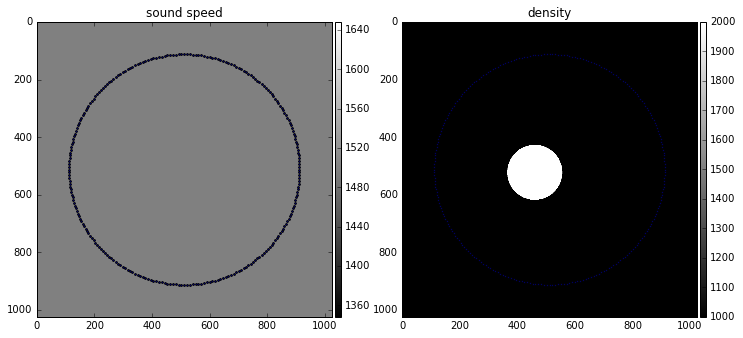

In [3]:
rf = RFdata(result_path)

rf.draw_input()

## サブセット取得

In [4]:
ngrid = np.array([512,512])
pos = rf.ngrid2pos(ngrid)
pos

array([0., 0.])

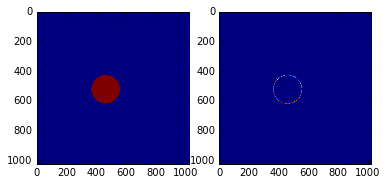

In [5]:
plt.subplot(1,2,1)
plt.imshow(rf.medium_imp)
plt.subplot(1,2,2)
plt.imshow(rf.medium_sct)

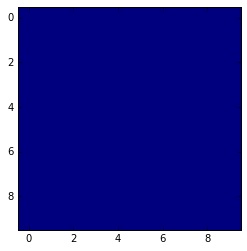

In [6]:
x, y = ngrid
plt.imshow(rf.medium_sct[y-5:y+5,x-5:x+5], interpolation='nearest')

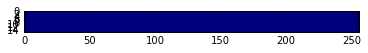

In [7]:
timemap, subset = rf.getPointSubset(ngrid, offset_arr=np.arange(-100,100,1))

plt.imshow(timemap)

### 展開図

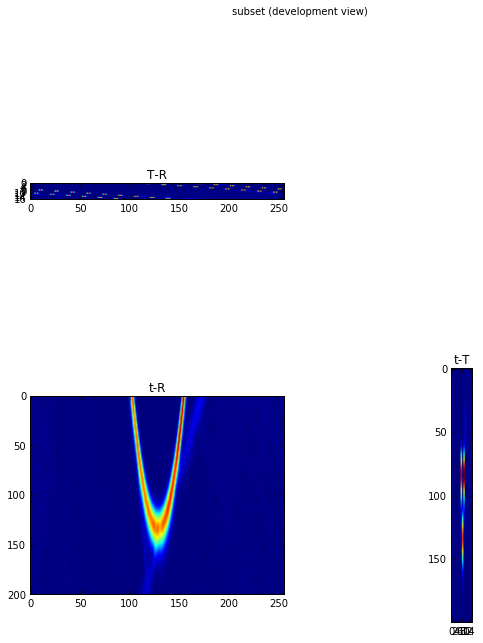

In [46]:
fig = plt.figure(figsize=(10,10))

fig.suptitle("subset (development view)")

plt.subplot(2,2,1)
plt.imshow(subset[:,:,0])
plt.title('T-R')

plt.subplot(2,2,3)
plt.imshow(subset[0,:,:].T)
plt.title('t-R')

plt.subplot(2,2,4)
plt.imshow(subset[:,0,:].T)
plt.title('t-T')

### 1次元平均圧縮

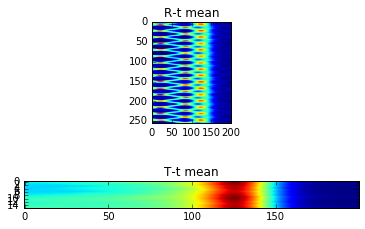

In [31]:
fig.suptitle("subset (1D mean reduction)")

plt.subplot(2,1,1)
plt.imshow(np.mean( subset, axis=0 ))
plt.title('R-t mean')

plt.subplot(2,1,2)
plt.imshow(np.mean(subset, axis=1))
plt.title('T-t mean')

### ２次元圧縮波形

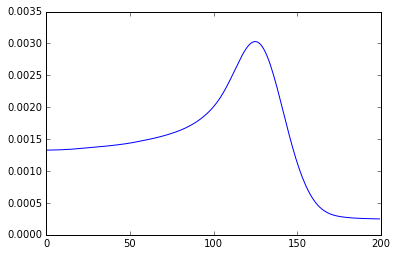

In [40]:
plt.plot(np.mean(np.mean(subset, axis=0), axis=0))

In [33]:
np.sum(subset[:,:,100])

8.239789140660235

## 透過波除去

送信素子から一定距離（リングアレイ半径）より遠い素子のRFデータをマスキング

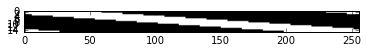

In [34]:
mask = (np.linalg.norm(rf.mesh_pos_rcv - rf.mesh_pos_src, axis=2) < rf.param["ringarray"]["radius"]*1.0 )*1

plt.imshow(mask, cmap='gray')

In [35]:
subset_ = subset * mask[:,:,np.newaxis]
subset_.shape

(16, 256, 200)

### 展開図

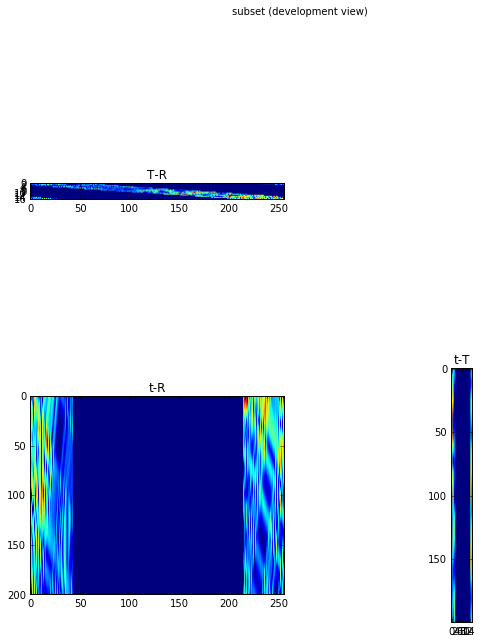

In [45]:
fig = plt.figure(figsize=(10,10))

fig.suptitle("subset (development view)")

plt.subplot(2,2,1)
plt.imshow(subset_[:,:,0])
plt.title('T-R')

plt.subplot(2,2,3)
plt.imshow(subset_[0,:,:].T)
plt.title('t-R')

plt.subplot(2,2,4)
plt.imshow(subset_[:,0,:].T)
plt.title('t-T')

### 1次元平均圧縮

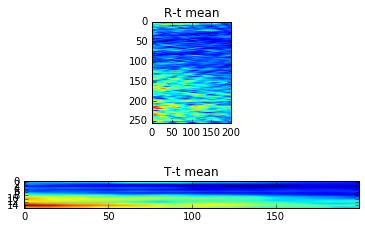

In [38]:
fig.suptitle("subset (1D mean reduction)")

plt.subplot(2,1,1)
plt.imshow(np.mean( subset_, axis=0 ))
plt.title('R-t mean')

plt.subplot(2,1,2)
plt.imshow(np.mean(subset_, axis=1))
plt.title('T-t mean')

### ２次元圧縮波形

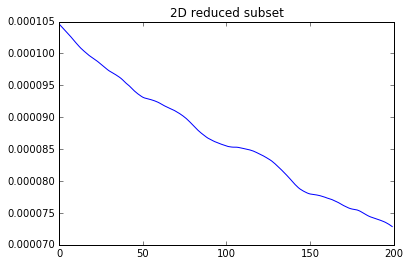

In [41]:
plt.plot(np.mean(np.mean(subset_, axis=0), axis=0))
plt.title("2D reduced subset")

In [42]:
np.sum(subset_[:,:,100])

0.35019380808187045

## Synthetic Aperture

グリッド圧縮率

In [16]:
c = 16

SA再構成

In [17]:
ngrids, mask, sa = rf.syntheticAperture(c=c)

透過波除去に用いたマスク

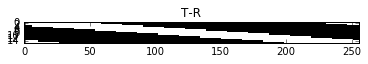

In [44]:
plt.imshow(mask, cmap='gray', interpolation='nearest')
plt.title('T-R')

シミュレーションに入力された音響インピーダンス画像と比較

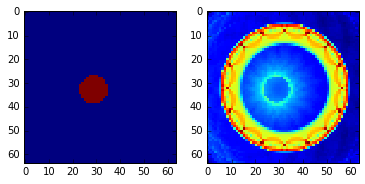

In [19]:
plt.subplot(1,2,1)
plt.imshow(rf.medium_imp[::c,::c], interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(sa, interpolation='nearest')

## misc

In [73]:
ts = rf.rawdata[8,8,:]
ts = np.concatenate( (ts, np.zeros_like(ts)))
ts.shape

(8748,)

In [27]:
ngrid = np.array([0,0])
rf.ngrid2pos(ngrid)

array([-0.064, -0.064])

In [29]:
pos = np.array([-0.05, 0])
rf.pos2ngrid(pos)

(512, 112)

In [16]:
points =  np.array([rf.pos2ngrid(pos) for pos in rf.sensor_pos])

points.shape

(256, 2)

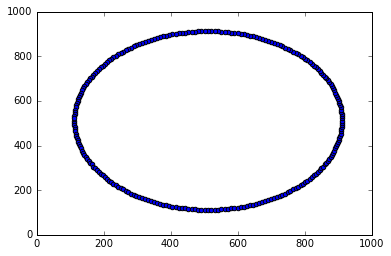

In [17]:
plt.scatter(points[:,0], points[:,1])

In [18]:
points =  np.array([rf.pos2ngrid(pos) for pos in rf.source_pos])

points.shape

(16, 2)

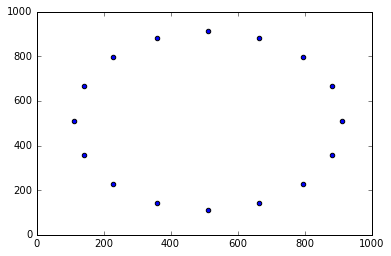

In [19]:
plt.scatter(points[:,0], points[:,1])